<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/portuguese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dane zawierają informacje na temat spożycia alkoholu wśród portugalskojęzycznych studentów.  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = "/content/PAD_06_PD.csv"
df = pd.read_csv(path,',')
print(df.columns)
df


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


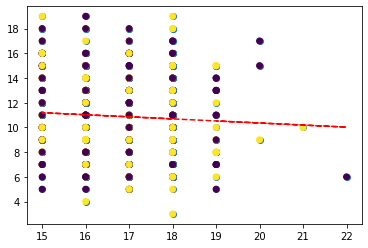

In [2]:
# Zadanie 1 

# Przedstaw na wykresie rozrzutu, relację między spożyciem alkoholu w tygodniu (G1) a wiekiem (Age). 
x = df.age
y = df.G1
plt.scatter(x, y)
# Dodatkowo, osobnymi kolorami zaznacz w wykresie osoby który rodzice mają ten sam poziom wykształcenia 
# (medu – wykształcenie matki, fedu – wykształcenie ojca). 
plt.scatter(x, y, c=(df.Medu==df.Fedu))
# Dodaj linię trendu do wykresu. 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

In [3]:
# Zadanie 2 

# Przedstaw histogram wieku osobno dla kobiet i mężczyzn. 
df1 = df[['sex', 'age']].copy()
df_m = df1[df1["sex"] == "M"]
df_f = df1[df1["sex"] == "F"]


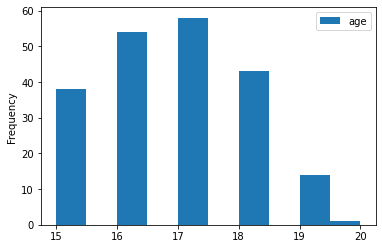

In [4]:
df_f.plot.hist()

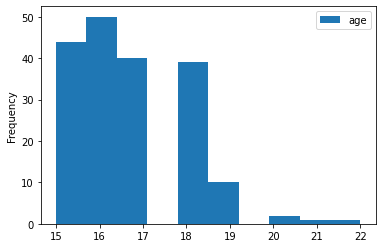

In [5]:
df_m.plot.hist()

In [6]:
# Zadanie 3 

# Kolumna FamSize ma dwie wartości LE3 – 3 lub mniej, GT3 3 – więcej niż 3. 
# Przedstaw za pomocą wykresu słupkowego jak wygląda średnia konsumpcja alkoholu (G1), 
# w podziale na płeć, w obdwu grupach wydzielonych ze względu na FamSize. 
# ax = df.plot.bar(x='age', rot=0)
df2 = df[['sex', 'famsize', 'G1']].copy()
df_gt3 = df2[df2["famsize"] == "GT3"]
df_le3 = df2[df2["famsize"] == "LE3"]
df_gt3 = df_gt3.drop(columns='famsize')
df_le3 = df_le3.drop(columns='famsize')

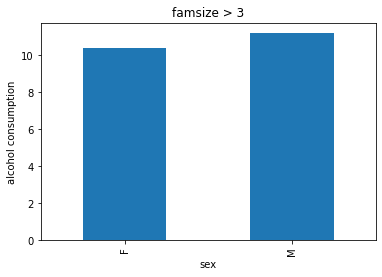

In [10]:
df_gt3_ = df_gt3.groupby(['sex'])['G1'].mean()
df_gt3_.plot.bar()
plt.title('famsize > 3')
plt.ylabel('alcohol consumption')
plt.show()

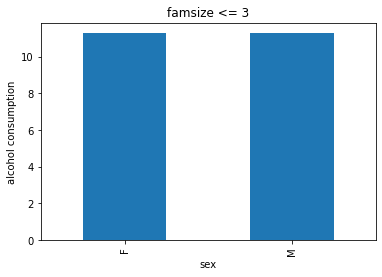

In [11]:
df_le3_ = df_le3.groupby(['sex'])['G1'].mean()
df_le3_.plot.bar()
plt.title('famsize <= 3')
plt.ylabel('alcohol consumption')
plt.show()